<a href="https://colab.research.google.com/github/moNassar12/first-contributions/blob/main/8puzzle_final_V4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8-puzzle problem


Write a Java program to solve the 8-puzzle problem using Priority Queue using the following instructions:

Problem Description:

The 8-puzzle problem is a puzzle invented and popularized by Noyes Palmer Chapman in the 1870s. It is played on a 3-by-3 grid
with 8 square blocks labeled 1 through 8 and a blank square. Your goal is to rearrange the blocks so that they are in order, using as
few moves as possible. You are permitted to slide blocks horizontally or vertically into the blank square. The following shows a sequence
of legal moves from an initial board (left) to the goal board (right).


```
    1  3        1     3        1  2  3        1  2  3        1  2  3
 4  2  5   =>   4  2  5   =>   4     5   =>   4  5      =>   4  5  6
 7  8  6        7  8  6        7  8  6        7  8  6        7  8

 initial        1 left          2 up          5 left          goal
 ```


Solution to the problme:
As a general artificial intelligence methodology known as the A* search algorithm, we define a search node of the game to be a board, the number of moves made to reach the board, and the predecessor search node.
1. First, insert the initial search node (the initial board, 0 moves, and a null predecessor search node) into a priority queue.
2. Then, delete from the priority queue the search node with the minimum priority, and insert onto the priority queue all neighboring search nodes (those that can be reached in one move from the dequeued search node).
3. Repeat this procedure until the search node dequeued corresponds to a goal board.

The success of this approach hinges on the choice of priority function for a search node. We consider two priority functions:

* _Hamming priority function._ The number of blocks in the wrong position, plus the number of moves made so far to get to the search node. Intuitively, a search node with a small number of blocks in the wrong position is close to the goal, and we prefer a search node that have been reached using a small number of moves.
* _Manhattan priority function._ The sum of the Manhattan distances (sum of the vertical and horizontal distance) from the blocks to their goal positions, plus the number of moves made so far to get to the search node.

For example, the Hamming and Manhattan priorities of the initial search node below are 5 and 10, respectively.

```

 8  1  3        1  2  3     1  2  3  4  5  6  7  8    1  2  3  4  5  6  7  8
 4     2        4  5  6     ----------------------    ----------------------
 7  6  5        7  8        1  1  0  0  1  1  0  1    1  2  0  0  2  2  0  3

 initial          goal         Hamming = 5 + 0          Manhattan = 10 + 0
```

4. We make a key observation: To solve the puzzle from a given search node on the priority queue, the total number of moves we need to make (including those already made) is at least its priority, using either the Hamming or Manhattan priority function.

 *For Hamming priority, this is true because each block that is out of place must move at least once to reach its goal position.

 *For Manhattan priority, this is true because each block must move its Manhattan distance from its goal position.

  Note that we do not count the blank square when computing the Hamming or Manhattan priorities. Consequently, when the goal board is dequeued, we have discovered not only a sequence of moves from the initial board to the goal board, but one that makes the fewest number of moves.

**A critical optimization.** Best-first search has one annoying feature: search nodes corresponding to the same board are enqueued on the priority queue many times. To reduce unnecessary exploration of useless search nodes, when considering the neighbors of a search node, don't enqueue a neighbor if its board is the same as the board of the predecessor search node.

```
  8  1  3       8  1  3       8  1          8  1  3       8  1  3
  4     2       4  2          4  2  3       4     2       4  2  5
  7  6  5       7  6  5       7  6  5       7  6  5       7  6

predecessor   search node    neighbor       neighbor      neighbor
                                           (disallow)
```

5. Optimization:
To avoid recomputing the Manhattan priority of a search node from scratch each time during various priority queue operations, pre-compute its value when you construct the search node; save it in an instance variable; and return the saved value as needed. This caching technique is broadly applicable: consider using it in any situation where you are recomputing the same quantity many times and for which computing that quantity is a bottleneck operation.

6. Game tree: One way to view the computation is as a game tree, where each search node is a node in the game tree and the children of a node correspond to its neighboring search nodes. The root of the game tree is the initial search node; the internal nodes have already been processed; the leaf nodes are maintained in a priority queue; at each step, the A* algorithm removes the node with the smallest priority from the priority queue and processes it (by adding its children to both the game tree and the priority queue).

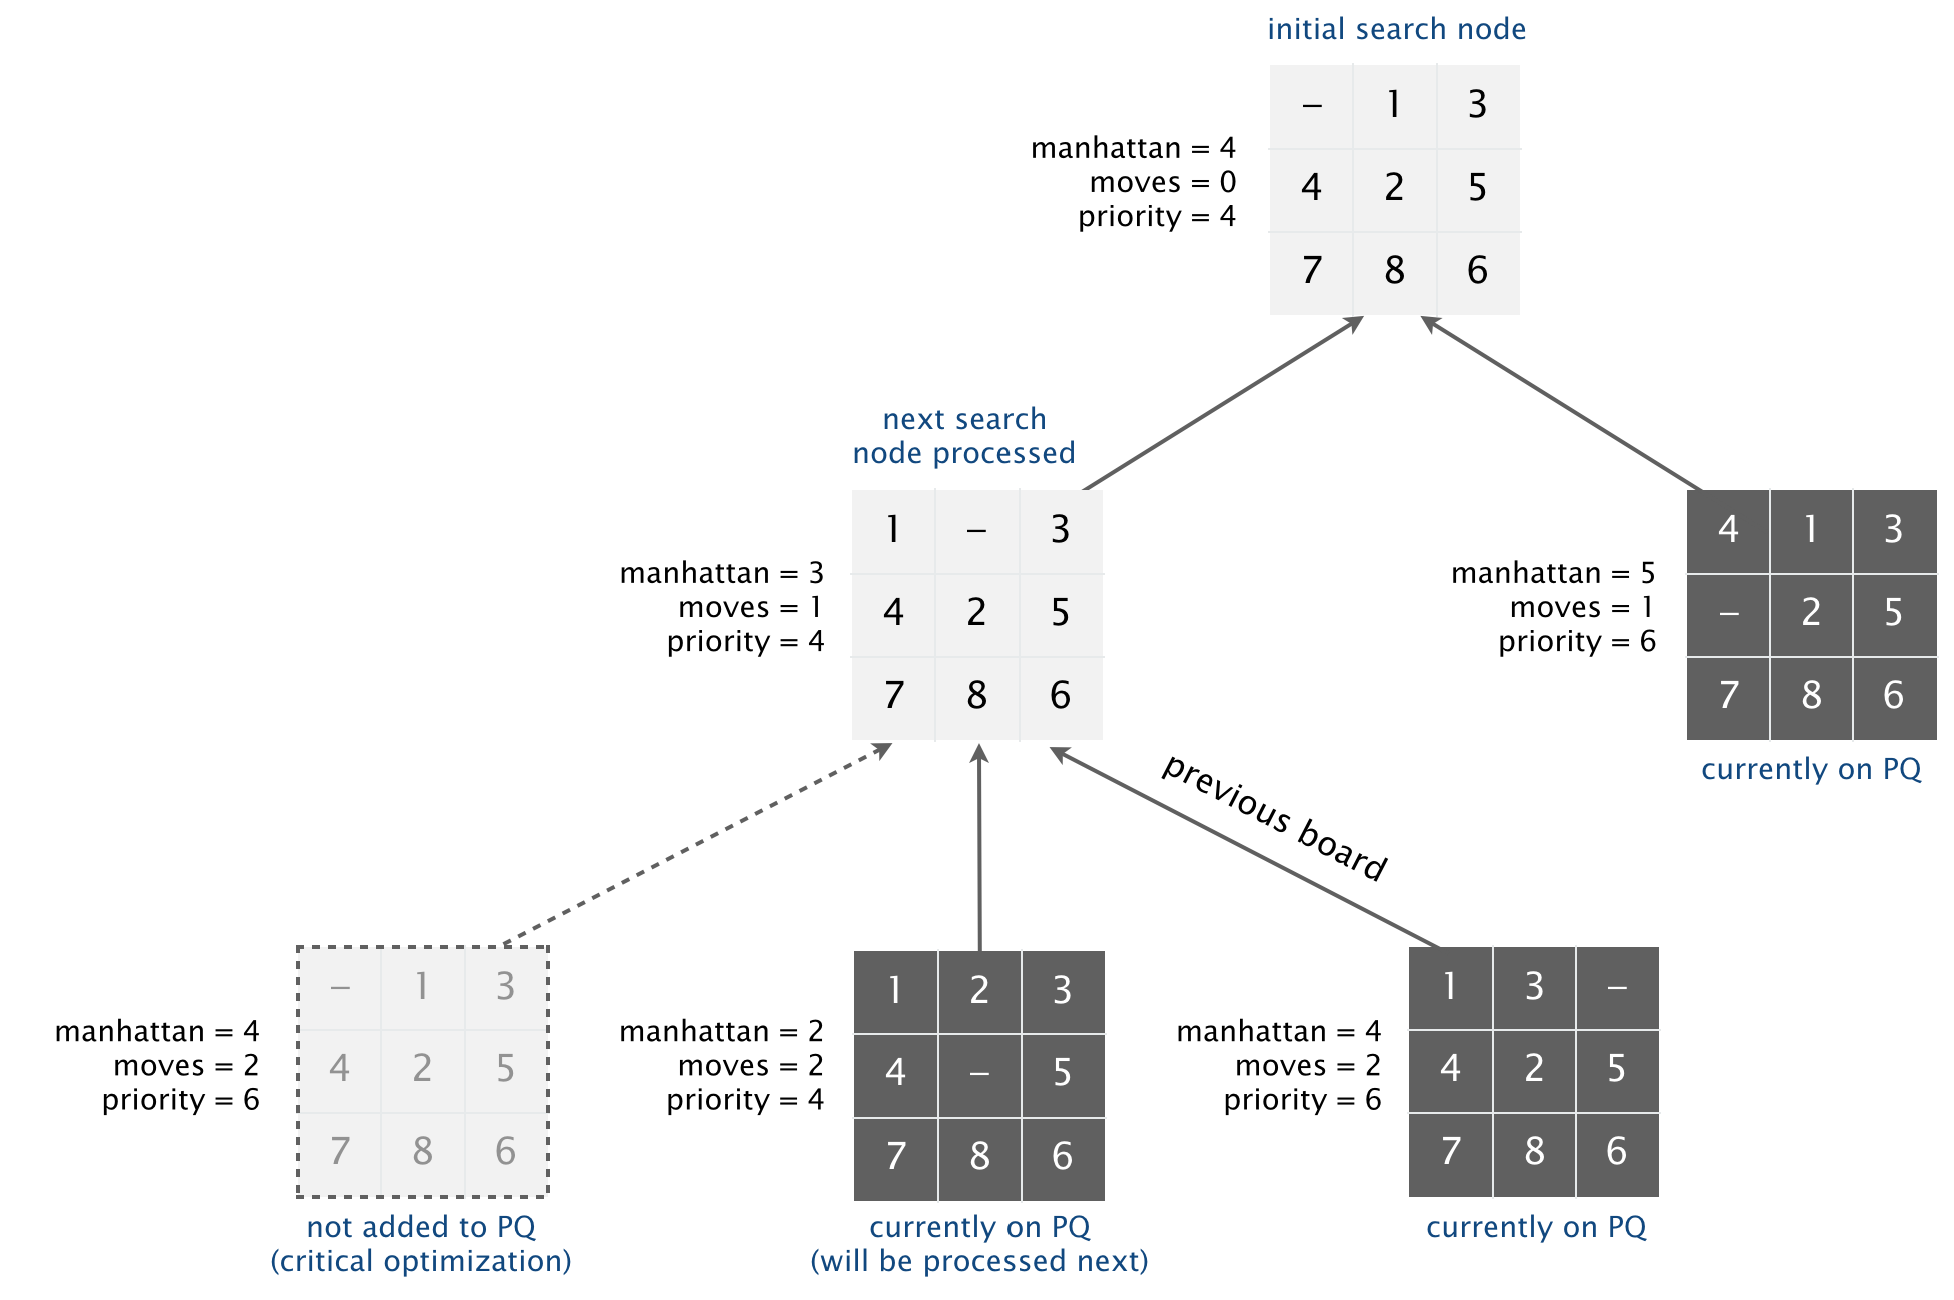



7. Board and Solver data types.** Here is an example to organize your program by creating an immutable data type Board with the following API:

```
public class Board {
    public Board(int[][] blocks)           // construct a board from an n-by-n array of blocks
                                           // (where blocks[i][j] = block in row i, column j)
    public int dimension()                 // board dimension n
    public int hamming()                   // number of blocks out of place
    public int manhattan()                 // sum of Manhattan distances between blocks and goal
    public boolean isGoal()                // is this board the goal board?
    public Board twin()                    // a board that is obtained by exchanging any pair of blocks
    public boolean equals(Object y)        // does this board equal y?
    public Iterable<Board> neighbors()     // all neighboring boards
    public String toString()               // string representation of this board (in the output format specified below)

    public static void main(String[] args) // unit tests (not graded)
}
```

_Corner cases._  You may assume that the constructor receives an n-by-n array containing the n2 integers between 0 and n2 − 1, where 0 represents the blank square.

_Performance requirements._  Your implementation should support all Board methods in time proportional to n2 (or better) in the worst case.

Also, create an immutable data type Solver with the following API:

```
public class Solver {
    public Solver(Board initial)           // find a solution to the initial board (using the A* algorithm)
    public boolean isSolvable()            // is the initial board solvable?
    public int moves()                     // min number of moves to solve initial board; -1 if unsolvable
    public Iterable<Board> solution()      // sequence of boards in a shortest solution; null if unsolvable
    public static void main(String[] args) // solve a slider puzzle (given below)
}
```

To implement the A* algorithm, you must use MinPQ from algs4.jar for the priority queue(s).

_Corner cases._  The constructor should throw a java.lang.IllegalArgumentException if passed a null argument.

**Solver test client.** Use the following test client to read a puzzle from a file (specified as a command-line argument) and print the solution to standard output.

```
public static void main(String[] args) {

    // create initial board from file
    In in = new In(args[0]);
    int n = in.readInt();
    int[][] blocks = new int[n][n];
    for (int i = 0; i < n; i++)
        for (int j = 0; j < n; j++)
            blocks[i][j] = in.readInt();
    Board initial = new Board(blocks);

    // solve the puzzle
    Solver solver = new Solver(initial);

    // print solution to standard output
    if (!solver.isSolvable())
        StdOut.println("No solution possible");
    else {
        StdOut.println("Minimum number of moves = " + solver.moves());
        for (Board board : solver.solution())
            StdOut.println(board);
    }
}
```
**Input and output formats.** The input and output format for a board is the board dimension n followed by the n-by-n initial board, using 0 to represent the blank square. Here is the expected output (o1) for 3-by-3 initial board.

```
% more puzzle04.txt
3
 0  1  3
 4  2  5
 7  8  6

% java-algs4 Solver puzzle04.txt
Minimum number of moves = 4

3
 0  1  3
 4  2  5
 7  8  6

3
 1  0  3
 4  2  5
 7  8  6

3
 1  2  3
 4  0  5
 7  8  6

3
 1  2  3
 4  5  0   
 7  8  6

3
 1  2  3
 4  5  6
 7  8  0


```

**Deliverables.** Submit the Google Colab file with working Board.java and Solver.java (with the Manhattan priority) and correct output o1 as described above.

Remark: algs4.jar is provided. You must use provided MinPQ for the priority queue(s). You may call any library functions including java.lang, java.util, and algs4.jar.


Algs4.Jar is provided

In [9]:
!apt-get install openjdk-11-jdk
!wget https://algs4.cs.princeton.edu/code/algs4.jar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
openjdk-11-jdk is already the newest version (11.0.24+8-1ubuntu3~22.04).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
--2024-10-13 17:21:55--  https://algs4.cs.princeton.edu/code/algs4.jar
Resolving algs4.cs.princeton.edu (algs4.cs.princeton.edu)... 128.112.136.67
Connecting to algs4.cs.princeton.edu (algs4.cs.princeton.edu)|128.112.136.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1156194 (1.1M) [application/x-java-archive]
Saving to: ‘algs4.jar.3’

algs4.jar.3         100%[===================>]   1.10M  --.-KB/s    in 0.1s    

2024-10-13 17:21:55 (8.18 MB/s) - ‘algs4.jar.3’ saved [1156194/1156194]



Board data types: here is an example to organize your program by creating an immutable data type Board with the following API:

```
public class Board {
    public Board(int[][] blocks)           // construct a board from an n-by-n array of blocks
                                           // (where blocks[i][j] = block in row i, column j)
    public int dimension()                 // board dimension n
    public int hamming()                   // number of blocks out of place
    public int manhattan()                 // sum of Manhattan distances between blocks and goal
    public boolean isGoal()                // is this board the goal board?
    public Board twin()                    // a board that is obtained by exchanging any pair of blocks
    public boolean equals(Object y)        // does this board equal y?
    public Iterable<Board> neighbors()     // all neighboring boards
    public String toString()               // string representation of this board (in the output format specified below)

    public static void main(String[] args) // unit tests (not graded)
}
```

_Corner cases._  You may assume that the constructor receives an n-by-n array containing the n2 integers between 0 and n2 − 1, where 0 represents the blank square.

_Performance requirements._  Your implementation should support all Board methods in time proportional to n2 (or better) in the worst case.



In [63]:
# Write Board.java
%%writefile Board.java

import java.util.ArrayList;
import java.util.Arrays;

public class Board {
    private final int[][] blocks; // store the blocks on the board
    private final int n; // dimension of the board

    // Constructor: Creates a board from an n-by-n array of blocks
    public Board(int[][] blocks) {
        this.n = blocks.length; // board dimension
        this.blocks = new int[n][n]; // create a new array for immutability
        for (int i = 0; i < n; i++) {
            for (int j = 0; j < n; j++) {
                this.blocks[i][j] = blocks[i][j]; // copy blocks to this.blocks
            }
        }
    }

    // Dimension of the board
    public int dimension() {
        return n;
    }

    // Hamming priority function: number of blocks out of place
    public int hamming() {
        int hamming = 0; // hamming score
        int expected = 1; // expected tile number
        for (int i = 0; i < n; i++) {
            for (int j = 0; j < n; j++) {
                if (blocks[i][j] != expected && blocks[i][j] != 0) {
                    hamming++; // count misplaced tiles
                }
                expected++;
            }
        }
        return hamming;
    }

    // Manhattan priority function: sum of Manhattan distances between blocks and goal
    public int manhattan() {
        int manhattan = 0; // manhattan score
        for (int i = 0; i < n; i++) {
            for (int j = 0; j < n; j++) {
                int block = blocks[i][j];
                if (block != 0) {
                    int targetRow = (block - 1) / n; // target row for this block
                    int targetCol = (block - 1) % n; // target col for this block
                    manhattan += Math.abs(i - targetRow) + Math.abs(j - targetCol); // Manhattan distance
                }
            }
        }
        return manhattan;
    }

    // Check if the board is the goal board
    public boolean isGoal() {
        return hamming() == 0;
    }

    // Create a twin board by swapping any pair of non-zero blocks
    public Board twin() {
        int[][] twinBlocks = copyBlocks(); // copy the blocks
        for (int i = 0; i < n; i++) {
            for (int j = 0; j < n - 1; j++) {
                if (twinBlocks[i][j] != 0 && twinBlocks[i][j + 1] != 0) {
                    // Swap the first two non-zero blocks
                    int temp = twinBlocks[i][j];
                    twinBlocks[i][j] = twinBlocks[i][j + 1];
                    twinBlocks[i][j + 1] = temp;
                    return new Board(twinBlocks);
                }
            }
        }
        return null; // no twin exists
    }

    // Check if this board is equal to another board
    @Override
    public boolean equals(Object y) {
        if (this == y) return true;
        if (y == null || this.getClass() != y.getClass()) return false;
        Board that = (Board) y;
        return Arrays.deepEquals(this.blocks, that.blocks);
    }

    // Get all neighboring boards
    public Iterable<Board> neighbors() {
        ArrayList<Board> neighbors = new ArrayList<>();
        int blankRow = -1, blankCol = -1;

        // Locate the blank (0) block
        for (int i = 0; i < n; i++) {
            for (int j = 0; j < n; j++) {
                if (blocks[i][j] == 0) {
                    blankRow = i;
                    blankCol = j;
                    break;
                }
            }
        }

        // Try to move the blank in all possible directions (up, down, left, right)
        if (blankRow > 0) neighbors.add(swap(blankRow, blankCol, blankRow - 1, blankCol)); // move up
        if (blankRow < n - 1) neighbors.add(swap(blankRow, blankCol, blankRow + 1, blankCol)); // move down
        if (blankCol > 0) neighbors.add(swap(blankRow, blankCol, blankRow, blankCol - 1)); // move left
        if (blankCol < n - 1) neighbors.add(swap(blankRow, blankCol, blankRow, blankCol + 1)); // move right

        return neighbors;
    }

    // Swap the blank block with another block and return a new board
    private Board swap(int row1, int col1, int row2, int col2) {
        int[][] newBlocks = copyBlocks();
        int temp = newBlocks[row1][col1];
        newBlocks[row1][col1] = newBlocks[row2][col2];
        newBlocks[row2][col2] = temp;
        return new Board(newBlocks);
    }

    // Copy the blocks array to a new 2D array
    private int[][] copyBlocks() {
        int[][] copy = new int[n][n];
        for (int i = 0; i < n; i++) {
            for (int j = 0; j < n; j++) {
                copy[i][j] = blocks[i][j];
            }
        }
        return copy;
    }

    // String representation of the board
    @Override
    public String toString() {
        StringBuilder sb = new StringBuilder();
        sb.append(n).append("\n");
        for (int i = 0; i < n; i++) {
            for (int j = 0; j < n; j++) {
                sb.append(String.format("%2d ", blocks[i][j]));
            }
            sb.append("\n");
        }
        return sb.toString();
    }
}




Overwriting Board.java


Create an immutable data type Solver with the following API:

```
public class Solver {
    public Solver(Board initial)           // find a solution to the initial board (using the A* algorithm)
    public boolean isSolvable()            // is the initial board solvable?
    public int moves()                     // min number of moves to solve initial board; -1 if unsolvable
    public Iterable<Board> solution()      // sequence of boards in a shortest solution; null if unsolvable
    public static void main(String[] args) // solve a slider puzzle (given below)
}
```

To implement the A* algorithm, you must use MinPQ from algs4.jar for the priority queue(s).

_Corner cases._  The constructor should throw a java.lang.IllegalArgumentException if passed a null argument.

**Solver test client.** Use the following test client to read a puzzle from a file (specified as a command-line argument) and print the solution to standard output.

```
public static void main(String[] args) {

    // create initial board from file
    In in = new In(args[0]);
    int n = in.readInt();
    int[][] blocks = new int[n][n];
    for (int i = 0; i < n; i++)
        for (int j = 0; j < n; j++)
            blocks[i][j] = in.readInt();
    Board initial = new Board(blocks);

    // solve the puzzle
    Solver solver = new Solver(initial);

    // print solution to standard output
    if (!solver.isSolvable())
        StdOut.println("No solution possible");
    else {
        StdOut.println("Minimum number of moves = " + solver.moves());
        for (Board board : solver.solution())
            StdOut.println(board);
    }
}
```
**Input and output formats.** The input and output format for a board is the board dimension n followed by the n-by-n initial board, using 0 to represent the blank square. Here is the expected output (o1) for 3-by-3 initial board.

```

In [64]:
%%writefile Solver.java
import edu.princeton.cs.algs4.In;
import edu.princeton.cs.algs4.MinPQ;
import edu.princeton.cs.algs4.StdOut;
import java.util.Stack;

import java.util.Stack;
import edu.princeton.cs.algs4.MinPQ;

public class Solver {
    private Node solutionNode; // holds the final solution node

    // A private helper class for search nodes in the priority queue
    private class Node implements Comparable<Node> {
        private Board board;
        private int moves;
        private Node previous;
        private int priority;

        public Node(Board board, int moves, Node previous) {
            this.board = board;
            this.moves = moves;
            this.previous = previous;
            this.priority = board.manhattan() + moves; // use Manhattan priority
        }

        @Override
        public int compareTo(Node that) {
            return this.priority - that.priority;
        }
    }

    // Constructor: Solve the puzzle using the A* algorithm
    public Solver(Board initial) {
        if (initial == null) throw new IllegalArgumentException("Initial board cannot be null");

        MinPQ<Node> pq = new MinPQ<>(); // priority queue
        pq.insert(new Node(initial, 0, null)); // insert the initial search node

        while (true) {
            Node minNode = pq.delMin(); // get the node with the lowest priority

            // If the goal is reached, set solutionNode and break
            if (minNode.board.isGoal()) {
                solutionNode = minNode;
                break;
            }

            // Add neighbors to the priority queue
            for (Board neighbor : minNode.board.neighbors()) {
                // Avoid adding the previous board (critical optimization)
                if (minNode.previous == null || !neighbor.equals(minNode.previous.board)) {
                    pq.insert(new Node(neighbor, minNode.moves + 1, minNode));
                }
            }
        }
    }

    // Check if the initial board is solvable
    public boolean isSolvable() {
        return solutionNode != null;
    }

    // Return the minimum number of moves to solve the puzzle
    public int moves() {
        if (!isSolvable()) return -1;
        return solutionNode.moves;
    }

    // Return the sequence of boards in the shortest solution
    public Iterable<Board> solution() {
        if (!isSolvable()) return null;
        Stack<Board> solution = new Stack<>();
        Node current = solutionNode;
        while (current != null) {
            solution.push(current.board);
            current = current.previous;
        }
        return solution;
    }

    // Test client to read a puzzle from a file and solve it
    public static void main(String[] args) {
        In in = new In(args[0]); // read the puzzle file
        int n = in.readInt();
        int[][] blocks = new int[n][n];
        for (int i = 0; i < n; i++)
            for (int j = 0; j < n; j++)
                blocks[i][j] = in.readInt();
        Board initial = new Board(blocks);

        Solver solver = new Solver(initial);

        if (!solver.isSolvable()) {
            StdOut.println("No solution possible");
        } else {
            StdOut.println("Minimum number of moves = " + solver.moves());
            for (Board board : solver.solution()) {
                StdOut.println(board);
            }
        }
    }
}



Overwriting Solver.java


In [65]:
%%writefile puzzle.txt
3
0 1 3
4 2 5
7 8 6

Overwriting puzzle.txt


Compile Board.java and Sover.java

In [66]:
!javac -cp .:algs4.jar Board.java Solver.java

Excute the program and produce outputs

In [67]:
!java -cp .:algs4.jar Solver puzzle.txt

Minimum number of moves = 4
3
 1  2  3 
 4  5  6 
 7  8  0 

3
 1  2  3 
 4  5  0 
 7  8  6 

3
 1  2  3 
 4  0  5 
 7  8  6 

3
 1  0  3 
 4  2  5 
 7  8  6 

3
 0  1  3 
 4  2  5 
 7  8  6 

